In [1]:
from src.morse import Morse

import os

In [2]:
folder = "Data/Serie/"
# index of relevant function value should be equal in all files
quality_index = 3

--------------------------------------------------------------------
File:  Data/Serie/curvature/1467_r1.00_n4_v256.volume.ply
Time read data file: 4.320539200000001
Time read and prepare data: 10.6738511
Mean:  -0.002959168816714935
Std:  6.3456715203125735e-12
--------------------------------------------------------------------
File:  Data/Serie/curvature/1645_r1.00_n4_v256.volume.ply
Time read data file: 1.7734211999999996
Time read and prepare data: 4.2027506
Mean:  0.005080772331731074
Std:  2.9856706154776505e-13
--------------------------------------------------------------------
File:  Data/Serie/curvature/1649_r1.00_n4_v256.volume.ply
Time read data file: 1.6743476000000008
Time read and prepare data: 3.9616595999999973
Mean:  0.0062383355175308864
Std:  1.5418871065212129e-13
--------------------------------------------------------------------
File:  Data/Serie/curvature/31_r1.00_n4_v256.volume.ply
Time read data file: 4.143043300000002
Time read and prepare data: 10.35012789

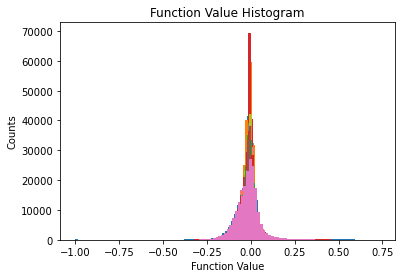

In [3]:
if not os.path.exists(folder + "histograms/"):
    os.makedirs(folder + "histograms/")
    
stats_dict = {}
for filename in os.listdir(folder+"curvature/"):
    if filename.endswith(".ply"):
        infilename = folder + "curvature/" + str(filename)
        outfilename =  folder + "histograms/" + str(os.path.splitext(filename)[0] + "_hist.png")
        
        obj_id = filename.split("_r1.00_n4_v256.volume", 1)[0]
        
        print("--------------------------------------------------------------------")
        print("File: ", infilename)
        data = Morse()
        data.load_mesh_ply(infilename, quality_index, inverted = True)
        stats = data.plot_funval_histogram(nb_bins = 100, log=False, save = True, filepath = outfilename, show = False)
        print("Mean: ", stats['mean'])
        print("Std: ", stats['std'])
        stats_dict[int(obj_id)] = stats

In [2]:
folderlist = ["Data/Serie/", "Data/Serie2/", "Data/Serie3/", "Data/Serie4/", "Data/Serie_last3/"]
bestres_dict = {}

for fol in folderlist:
    for file in os.listdir(fol+"results/"):
        if file.endswith('.txt'):
            f = open(fol+"results/"+file)
            lines = f.readlines()
            rows = []
            for i, row in enumerate(lines):
                row=row.split(" ")
                if i != 0:
                    if int(row[0]) not in bestres_dict.keys():
                        bestres_dict[int(row[0])] = [float(row[1]), float(row[2][1:-1]), 
                                                     float(row[3][:-1]), float(row[4][:-1]), 
                                                     float(row[5][:-2])]
                    else:
                        if bestres_dict[int(row[0])][0] < float(row[1]):
                            bestres_dict[int(row[0])] = [float(row[1]), float(row[2][1:-1]), 
                                                         float(row[3][:-1]), float(row[4][:-1]), 
                                                         float(row[5][:-2])]
            f.close()
av=0
for ids in bestres_dict.keys():
    print("ID: ",ids,bestres_dict[ids])
    av += bestres_dict[ids][0]
print(av/len(bestres_dict))

ID:  1467 [90.5685413235025, 0.06, 0.07, 0.03, 0.5]
ID:  1645 [94.54562991303229, 0.06, 0.05, 0.04, 0.5]
ID:  1649 [90.60917156746099, 0.06, 0.05, 0.03, 0.2]
ID:  31 [91.84601912788868, 0.04, 0.09, 0.07, 0.3]
ID:  4124 [94.75755242447576, 0.06, 0.06, 0.05, 0.4]
ID:  4501 [98.01451985480145, 0.1, 0.09, 0.08, 0.3]
ID:  4636 [90.69459305406946, 0.05, 0.06, 0.05, 0.4]
ID:  5169 [95.13364599062028, 0.05, 0.06, 0.03, 0.2]
ID:  5194 [93.92356076439235, 0.06, 0.06, 0.05, 0.4]
ID:  5219 [95.3895, 0.06, 0.07, 0.04, 0.5]
ID:  5244 [94.65771785228455, 0.04, 0.1, 0.08, 0.3]
ID:  6626 [82.0425843490206, 0.04, 0.07, 0.06, 0.5]
ID:  691 [95.81350834016953, 0.06, 0.07, 0.05, 0.5]
ID:  700 [81.43806507226911, 0.04, 0.11, 0.1, 0.4]
ID:  709 [93.47144272036975, 0.06, 0.05, 0.04, 0.5]
ID:  710 [92.6194130925508, 0.04, 0.08, 0.06, 0.3]
ID:  728 [89.79760202397976, 0.04, 0.06, 0.03, 0.2]
ID:  729 [94.63255367446325, 0.04, 0.05, 0.04, 0.5]
ID:  737 [93.20767631031669, 0.04, 0.07, 0.06, 0.3]
ID:  742 [94.65251

In [3]:
folderlist = ["Data/SerieFinal/"]
bestres_dict = {}

for fol in folderlist:
    for file in os.listdir(fol+"results/"):
        if file.endswith('.txt'):
            f = open(fol+"results/"+file)
            lines = f.readlines()
            rows = []
            for i, row in enumerate(lines):
                row=row.split(" ")
                if i != 0:
                    if int(row[0]) not in bestres_dict.keys():
                        bestres_dict[int(row[0])] = [float(row[1]), float(row[2][1:-1]), 
                                                     float(row[3][:-1]), float(row[4][:-1]), 
                                                     float(row[5][:-2])]
                    else:
                        if bestres_dict[int(row[0])][0] < float(row[1]):
                            bestres_dict[int(row[0])] = [float(row[1]), float(row[2][1:-1]), 
                                                         float(row[3][:-1]), float(row[4][:-1]), 
                                                         float(row[5][:-2])]
            f.close()
av=0
for ids in bestres_dict.keys():
    print("ID: ",ids,bestres_dict[ids])
    av += bestres_dict[ids][0]
print(av/len(bestres_dict))

ID:  1467 [89.55016079692525, 0.04, 0.08, 0.03, 0.6]
ID:  1645 [94.47168325108107, 0.04, 0.05, 0.04, 0.5]
ID:  1649 [90.02107624842778, 0.04, 0.06, 0.03, 0.6]
ID:  31 [93.47216331221695, 0.04, 0.06, 0.05, 0.3]
ID:  4124 [92.65107348926512, 0.04, 0.07, 0.03, 0.5]
ID:  4501 [97.1230287697123, 0.04, 0.09, 0.04, 0.4]
ID:  4636 [92.2640773592264, 0.04, 0.05, 0.04, 0.6]
ID:  5169 [95.11464656060318, 0.04, 0.05, 0.04, 0.2]
ID:  5194 [95.40354596454036, 0.04, 0.09, 0.04, 0.3]
ID:  5219 [93.66250000000001, 0.04, 0.08, 0.05, 0.5]
ID:  5244 [94.37715051612386, 0.04, 0.1, 0.09, 0.4]
ID:  6626 [82.17055770464398, 0.04, 0.07, 0.05, 0.6]
ID:  691 [95.47990155865463, 0.04, 0.06, 0.05, 0.3]
ID:  695 [91.8458207855327, 0.04, 0.09, 0.04, 0.6]
ID:  700 [83.35404847342782, 0.04, 0.06, 0.05, 0.6]
ID:  709 [91.6350280620667, 0.04, 0.05, 0.03, 0.6]
ID:  710 [92.59593679458239, 0.04, 0.06, 0.05, 0.3]
ID:  713 [95.62881097560975, 0.04, 0.07, 0.04, 0.4]
ID:  722 [89.86385128078537, 0.04, 0.05, 0.03, 0.5]
ID:  72

In [11]:
a=[0.1,0.2,0.4,0.7,0.3,0.7,0.9]
print([i for i in a if i>0.5])

[0.7, 0.7, 0.9]


In [28]:
th1=[]
th2=[]
th3=[]
for ids in bestres_dict.keys():
    if bestres_dict[ids][0]>93:
        th1.append(len([i for i in stats_dict[str(ids)]['fun_vals'] if i > bestres_dict[ids][2]])/len(stats_dict[str(ids)]['fun_vals']))
        th2.append(len([i for i in stats_dict[str(ids)]['fun_vals'] if i > bestres_dict[ids][3]])/len(stats_dict[str(ids)]['fun_vals']))
        th3.append(len([i for i in stats_dict[str(ids)]['fun_vals'] if i > bestres_dict[ids][1]])/len(stats_dict[str(ids)]['fun_vals']))
print(th1)
print(th2)
print(th3)

[0.09426591862652113, 0.05698443015569844, 0.03909960900390996, 0.053553393398198056, 0.06340436595634044, 0.040555, 0.04697127310554533, 0.06964725184577522, 0.1093388907230109, 0.06325436745632544, 0.051443915023560695, 0.1265866014001935, 0.08076923076923077, 0.04967950320496795, 0.048772990122439984]
[0.1101966016686225, 0.06631933680663193, 0.043794562054379454, 0.0889723308300751, 0.07965920340796592, 0.068425, 0.05573337601024246, 0.09762100082034454, 0.12790937603169364, 0.07535424645753543, 0.058240977176402454, 0.1744265467584951, 0.12813328912466843, 0.057019429805701946, 0.10230205729332816]
[0.08314176861124954, 0.05698443015569844, 0.034929650703492965, 0.061653150405487835, 0.06340436595634044, 0.046935, 0.09773345602944707, 0.08118676510801204, 0.09539039286893364, 0.07535424645753543, 0.08020112143628083, 0.11178780807103421, 0.08076923076923077, 0.0970340296597034, 0.07931048482985424]


In [29]:
print(sum(th1)/len(th1))
print(sum(th2)/len(th2))
print(sum(th3)/len(th3))

0.06628844938611451
0.08894048894973913
0.07638772673748671


In [40]:
b=sorted(stats_dict[str(31)]['fun_vals'])
newlen=int(0.08*len(b))
print(b[-newlen])

0.05305875837802887
